In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

Making API Calls

In [5]:
api_key = api_keys.api_key

# Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
y = []

for x in cities:
    try:
        params = {"appid" : api_key, "q" : x, "units" : "imperial"}
        response = requests.get(url, params= params).json()
        #print(response)
        lat_value = response['coord']['lat']
        temp_value = response['main']['temp']
        humidity_value = response['main']['humidity']
        cloudiness_value = response["clouds"]["all"]
        wind_speed_value = response['wind']['speed']
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response['wind']['speed'])
        y.append(x)
        print(f" For {x} The latitude is {lat_value} Temperature is {temp_value}  Humidity(%) is {humidity_value} Cloudiness(%) is {cloudiness_value} Wind Speed is {wind_speed_value}")
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
        

 For georgetown The latitude is 6.8 Temperature is 75.2  Humidity(%) is 100 Cloudiness(%) is 75 Wind Speed is 4.7
 For cape town The latitude is -33.93 Temperature is 50  Humidity(%) is 93 Cloudiness(%) is 75 Wind Speed is 12.75
City not found... skipping.
 For dingle The latitude is 11 Temperature is 85.77  Humidity(%) is 72 Cloudiness(%) is 32 Wind Speed is 11.45
 For rikitea The latitude is -23.12 Temperature is 68.94  Humidity(%) is 100 Cloudiness(%) is 76 Wind Speed is 22.97
City not found... skipping.
 For kambove The latitude is -10.88 Temperature is 59.67  Humidity(%) is 69 Cloudiness(%) is 56 Wind Speed is 2.28
 For busselton The latitude is -33.64 Temperature is 58.77  Humidity(%) is 100 Cloudiness(%) is 64 Wind Speed is 4.97
 For roald The latitude is 62.58 Temperature is 52.38  Humidity(%) is 81 Cloudiness(%) is 80 Wind Speed is 13.87
 For farkhor The latitude is 37.49 Temperature is 71.1  Humidity(%) is 42 Cloudiness(%) is 0 Wind Speed is 3.96
 For barrow The latitude is -

Saving the Data sets results into a CSV file

In [6]:
# creating a data frame with the data sets

city_data = pd.DataFrame({"Cities" : y, "Latitude" : lat, "Temperature(Fahrenheit)" : temp, "Humidity": humidity
                         , "Cloudiness" : cloudiness, "Wind Speed(mph)": wind_speed})

# Giving the displayed data cleaner formatting
city_data["Humidity"] = city_data["Humidity"].map("{}%".format)
city_data["Cloudiness"] = city_data["Cloudiness"].map("{}%".format)

# Displaying the data
city_data.head()

,Cities,Latitude,Temperature(Fahrenheit),Humidity,Cloudiness,Wind Speed(mph)
0,georgetown,6.80,75.20,100%,75%,4.70
1,cape town,-33.93,50.00,93%,75%,12.75
2,dingle,11.00,85.77,72%,32%,11.45
3,rikitea,-23.12,68.94,100%,76%,22.97
4,kambove,-10.88,59.67,69%,56%,2.28


In [8]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"

city_data.to_csv("city_data.csv", encoding="utf-8", index=False)

##The Scatter Plots

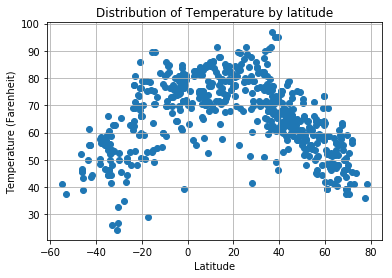

In [9]:
# Build a scatter plot for Temperature vs Latitude of different cities
plt.scatter(lat, temp, marker="o")

# Incorporate the other graph properties
plt.title("Distribution of Temperature by latitude")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/TemperatureInWorldCities.png")

# Show plot
plt.show()

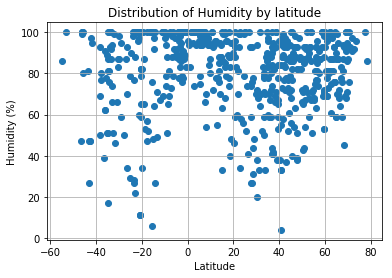

In [10]:
# Build a scatter plot for Humidity Vs Latitude of different cities
plt.scatter(lat, humidity, marker="o")

# Incorporate the other graph properties
plt.title("Distribution of Humidity by latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/HumidityInWorldCities.png")

# Show plot
plt.show()

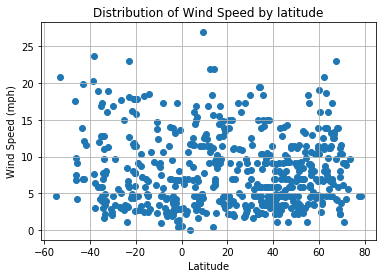

In [11]:
# Build a scatter plot for Wind speed Vs Latitude of different cities
plt.scatter(lat, wind_speed, marker="o")

# Incorporate the other graph properties
plt.title("Distribution of Wind Speed by latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/WindSpeedInWorldCities.png")

# Show plot
plt.show()

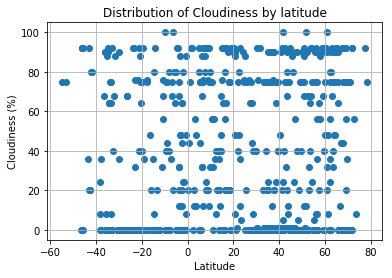

In [12]:
# Build a scatter plot for Cloudiness Vs Latitude of different cities
plt.scatter(lat, cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Distribution of Cloudiness by latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CloudinessInWorldCities.png")

# Show plot
plt.show()